# Installing packages and mounting google drive

In [ ]:
!pip install pingouin

In [ ]:
!pip install stemgraphic
import stemgraphic

In [29]:
from pandas.core import describe
import math
import statistics
import numpy as np
from scipy.stats import stats
import pandas as pd
import matplotlib.pyplot as plt
import pandas as pd
import pingouin as pg
from scipy.stats import norm

In [5]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


# Question 1

In [20]:
# Uploading and reading the csv file
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks SQC/BUSHING DIAMETER 2 BATCHES.csv')
data.describe()

,Batch 1,Batch 2
count,50.000000,50.000000
mean,1.003360,1.003660
std,0.007714,0.007227
min,0.985000,0.990000
25%,0.999000,1.000000
50%,1.001000,1.005000
75%,1.009000,1.006750
max,1.025000,1.019000


In [21]:
# Seperating the Batches from the data read in
a = list(data["Batch 1"])
print('List for Batch 1', a)
b = list(data["Batch 2"])
print('List for Batch 2', b)

List for Batch 1 [1.001000047, 1.004999995, 1.014999986, 1.019999981, 1.00999999, 1.014999986, 1.0, 1.00999999, 0.999000013, 1.00999999, 0.995999992, 1.0, 1.003999949, 0.995000005, 1.006000042, 0.985000014, 1.00999999, 1.0, 0.995000005, 1.0, 1.0, 0.999000013, 1.014000058, 1.008999944, 1.004999995, 1.024999976, 1.003999949, 1.003999949, 0.999000013, 1.0, 1.014000058, 1.008999944, 0.994000018, 1.008999944, 0.999000013, 1.003999949, 1.008999944, 0.989000022, 1.003000021, 1.008999944, 0.995999992, 0.995999992, 1.0, 1.001000047, 1.001000047, 1.001000047, 0.995000005, 1.0, 1.00999999, 0.994000018]
List for Batch 2 [1.0, 1.004999995, 1.014999986, 1.004999995, 0.99000001, 1.004999995, 1.014999986, 1.0, 1.004999995, 0.99000001, 0.996999979, 1.0, 1.001999974, 1.001000047, 1.006000042, 1.004999995, 1.00999999, 1.014999986, 1.0, 1.0, 1.014999986, 0.995000005, 1.004999995, 1.00999999, 1.00999999, 1.006000042, 0.999000013, 1.006000042, 1.004999995, 1.001000047, 1.006999969, 0.995000005, 1.006999969,

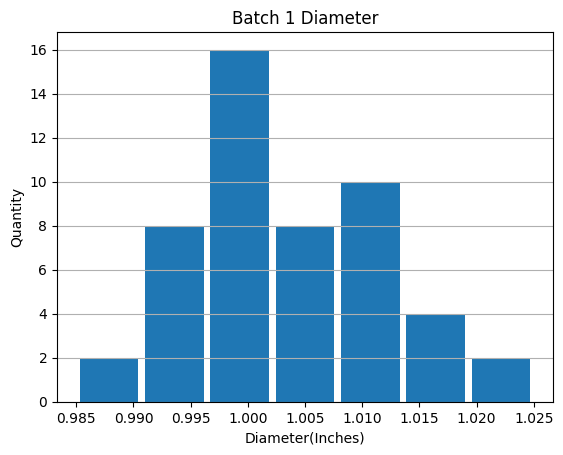

In [22]:
# Creating histogram from Batch 1
plt.hist(a, bins=7, rwidth=0.9)
plt.title('Batch 1 Diameter')
plt.xlabel('Diameter(Inches)')
plt.ylabel('Quantity')
plt.grid(axis='y')

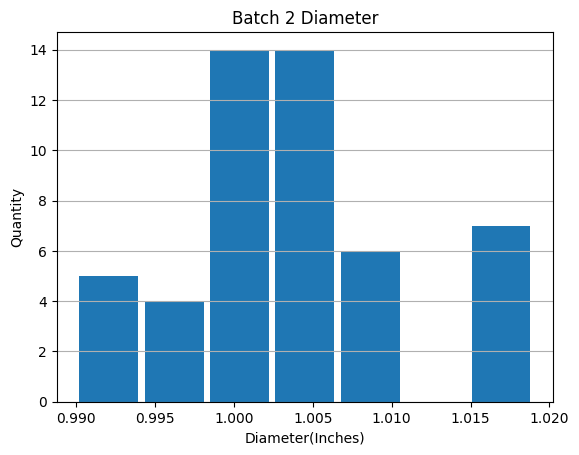

In [23]:
# Creating histogram from Batch 2
plt.hist(b, bins=7, rwidth=0.9)
plt.title('Batch 2 Diameter')
plt.xlabel('Diameter(Inches)')
plt.ylabel('Quantity')
plt.grid(axis='y')

Text(0.5, 1.0, 'Batch 1 Normality Plot')

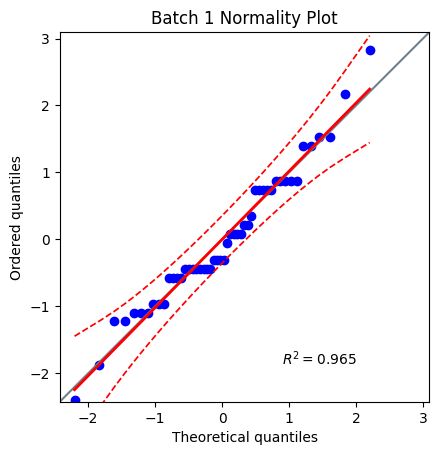

In [24]:
# Creating Normality Plot from Batch 1
pg.qqplot(a).set_title('Batch 1 Normality Plot')

Text(0.5, 1.0, 'Batch 1 Normality Plot')

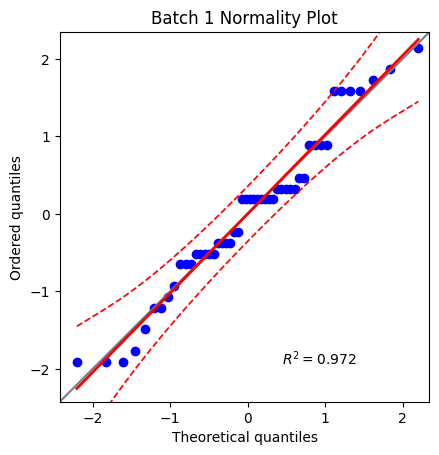

In [25]:
# Creating Normality Plot from Batch 2
pg.qqplot(b).set_title('Batch 1 Normality Plot')

The plot a the numerical data show little differences from these two batches the mean is the exact same but the variation in batch 1 is slightly higher than batch 2. This can be seen in the histogram and the describe ran on both bathces.

# Question 2

The random varible is μ.
Null Hypothosis is μb - μa = 0.
Alternative Hypothosis is μb - μa ≠ 0.

In [12]:
stats.ttest_ind(a, b, equal_var=True)

<ipython-input-12-b81ad7b5af10>:1: DeprecationWarning:

Please use `ttest_ind` from the `scipy.stats` namespace, the `scipy.stats.stats` namespace is deprecated.



TtestResult(statistic=-0.20069320812014202, pvalue=0.8413543932394967, df=98.0)

Since the p value from this test is bigger than .05 we conclude that there is no significant difference between the two batches.

# Exercise 4.6 was done by Hand Calulations

# Exercise 4.11 Part A

In [28]:
wafers = [13.3987, 13.3957, 13.3902, 13.4015, 13.4001, 13.3918, 13.3965, 13.3925, 13.3946, 13.4002]
w_mean = np.mean(wafers)
w_std = np.std(wafers, ddof = 1)
print('Mean =', w_mean, 'Standard Deviation =', w_std)

Mean = 13.396180000000001 Standard Deviation = 0.003908622945915024


In [31]:
n = len(wafers)
pval = norm.cdf((w_mean - 13.4)/(w_std/np.sqrt(n)))
print('P value =', pval)

P value = 0.0009988395866671687


Since the p value is lower than .25 the conclusion is that we reject the null. We are 95% certain that the mean is not 13.4.

# Part B

In [35]:
# Found the test stastic from chart
t = 3.250
Upper_Limit = w_mean + t * (w_std/np.sqrt(n))
Lower_Limit = w_mean - t * (w_std/np.sqrt(n))
print('The upper limit is', Upper_Limit, 'The lower limit is', Lower_Limit, 'for a 99% confidence interval')

The upper limit is 13.400197049082765 The lower limit is 13.392162950917237 for a 99% confidence interval


# Part C

Text(0.5, 1.0, 'Wafers Normality Plot')

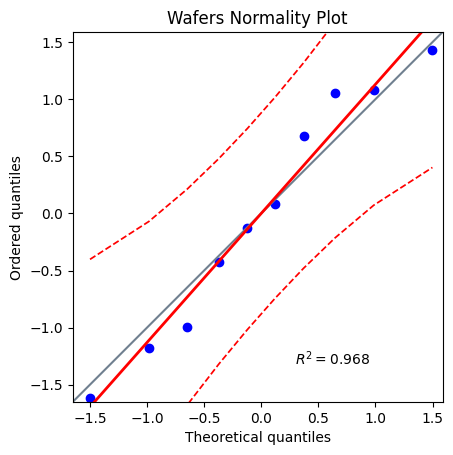

In [19]:
pg.qqplot(wafers).set_title('Wafers Normality Plot')

Based on the normality plot the wafers can be considered normally distributed.